In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols

%matplotlib inline

In [2]:
df = pd.read_csv('kc_housing_data_location_and_high_correlation.csv')
df.head()

,price,is_cust_build,grade,view,waterfront,lat,long,zipcode,sqft_living,bedrooms,bathrooms,floors,sqft_living15,sqft_above,date,has_basement,years_since_renovated,condition
0,221900.0,0,7,0.0,0.0,47.5112,-122.257,98178,1180,3,1.00,1.0,1340,1180,10/13/2014,0,0.0,3
1,538000.0,0,7,0.0,0.0,47.7210,-122.319,98125,2570,3,2.25,2.0,1690,2170,12/9/2014,1,29.0,3
2,180000.0,0,6,0.0,0.0,47.7379,-122.233,98028,770,2,1.00,1.0,2720,770,2/25/2015,0,0.0,3
3,604000.0,0,7,0.0,0.0,47.5208,-122.393,98136,1960,4,3.00,1.0,1360,1050,12/9/2014,1,0.0,5
4,510000.0,0,8,0.0,0.0,47.6168,-122.045,98074,1680,3,2.00,1.0,1800,1680,2/18/2015,0,0.0,3


In [8]:
outcome = 'price'
x_cols = ['is_cust_build', 'grade', 'view', 'waterfront', 'lat', 'long',
       'zipcode', 'sqft_living', 'bedrooms', 'bathrooms', 'floors',
       'sqft_living15', 'sqft_above', 'has_basement',
       'years_since_renovated', 'condition']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     3047.
Date:                Wed, 03 Jun 2020   Prob (F-statistic):               0.00
Time:                        07:14:30   Log-Likelihood:            -2.9463e+05
No. Observations:               21597   AIC:                         5.893e+05
Df Residuals:                   21580   BIC:                         5.894e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -3.114e+07   2.78e+06    -11.199      0.000   -3.66e+07   -2.57e+07
is_cust_build          6.929e+05   2.14e+04     32.440      0.000    6.51e+05    7.35e+05
grade                  7.302e+04   2146.233     34.024      0.000    6.88e+04    7.72e+04
view                   5.897e+04   2137.575     27.586      0.000    5.48e+04    6.32e+04
waterfront             5.984e+05   1.84e+04     32.592      0.000    5.62e+05    6.34e+05
lat                    6.759e+05   1.07e+04     63.388      0.000    6.55e+05    6.97e+05
long                  -3.279e+05   1.27e+04    -25.751      0.000   -3.53e+05   -3.03e+05
zipcode                -424.4983     33.142    -12.809      0.000    -489.459    -359.538
sqft_living             153.8702      6.069     25.355      0.000     141.975     165.765
bedrooms              -2.555e+04   1918.511    -13.316      0.000   -2.93e+04   -2.18e+04
bathrooms              4971.7704   3140.162      1.583      0.113   -1183.179    1.11e+04
floors                -1.204e+04   3558.878     -3.383      0.001    -1.9e+04   -5062.760
sqft_living15            28.5497      3.486      8.190      0.000      21.717      35.383
sqft_above               29.5813      6.644      4.452      0.000      16.559      42.604
has_basement           5806.1671   5127.654      1.132      0.258   -4244.415    1.59e+04
years_since_renovated  2715.3993    265.861     10.214      0.000    2194.293    3236.506
condition              5.219e+04   2249.211     23.203      0.000    4.78e+04    5.66e+04
==============================================================================
Omnibus:                    15801.930   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           993990.430
Skew:                           2.926   Prob(JB):                         0.00
Kurtosis:                      35.716   Cond. No.                     1.97e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

17 14
['is_cust_build', 'grade', 'view', 'waterfront', 'lat']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,-3.114e+07,2.78e+06,-11.199,0.0,-3.66e+07,-2.57e+07
is_cust_build,6.929e+05,2.14e+04,32.440,0.0,6.51e+05,7.35e+05
grade,7.302e+04,2146.233,34.024,0.0,6.88e+04,7.72e+04
view,5.897e+04,2137.575,27.586,0.0,5.48e+04,6.32e+04
waterfront,5.984e+05,1.84e+04,32.592,0.0,5.62e+05,6.34e+05


# Stats Check

In [4]:
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('is_cust_build', 1.0485915303799462),
 ('view', 1.4040532823861636),
 ('waterfront', 1.1843980934874359),
 ('sqft_living15', 7.37961073829712),
 ('has_basement', 1.7070440790627153),
 ('years_since_renovated', 1.0341433017056796),
 ('condition', 7.505845093684673)]

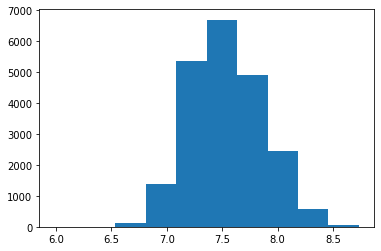

In [5]:
# Log Transform sqft_living15
log_sqft_living15 = np.log(df['sqft_living15'])
plt.hist(log_sqft_living15)
plt.show()

In [8]:
df_log = df.copy()

In [7]:
df_log['sqft_living15'] = log_sqft_living15
df_log.head()

,price,is_cust_build,view,waterfront,sqft_living15,has_basement,years_since_renovated,condition
0,221900.0,0,0.0,0.0,7.200425,0,0.0,3
1,538000.0,0,0.0,0.0,7.432484,1,29.0,3
2,180000.0,0,0.0,0.0,7.908387,0,0.0,3
3,604000.0,0,0.0,0.0,7.215240,1,0.0,5
4,510000.0,0,0.0,0.0,7.495542,0,0.0,3


# Round 2

In [15]:
outcome = 'price'
x_cols = ['is_cust_build', 'view', 'waterfront',
         'sqft_living15', 'has_basement']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_log).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     3956.
Date:                Wed, 03 Jun 2020   Prob (F-statistic):               0.00
Time:                        07:10:58   Log-Likelihood:            -3.0037e+05
No. Observations:               21597   AIC:                         6.008e+05
Df Residuals:                   21591   BIC:                         6.008e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.374e+04   5852.887     -5.765      0.000   -4.52e+04   -2.23e+04
is_cust_build  1.174e+06    2.7e+04     43.511      0.000    1.12e+06    1.23e+06
view           7.516e+04   2694.708     27.891      0.000    6.99e+04    8.04e+04
waterfront     6.411e+05   2.39e+04     26.859      0.000    5.94e+05    6.88e+05
sqft_living15   257.7796      2.788     92.474      0.000     252.316     263.243
has_basement   8.966e+04   3772.971     23.764      0.000    8.23e+04    9.71e+04
==============================================================================
Omnibus:                    15542.699   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           769946.654
Skew:                           2.932   Prob(JB):                         0.00
Kurtosis:                      31.657   Cond. No.                     3.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
X = df_log[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('is_cust_build', 1.0299230296952477),
 ('view', 1.3743373266109542),
 ('waterfront', 1.1800444067903724),
 ('sqft_living15', 1.6584556652699958),
 ('has_basement', 1.5865027430106269)]

In [17]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

6 5
['is_cust_build', 'view', 'waterfront', 'sqft_living15', 'has_basement']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,-3.374e+04,5852.887,-5.765,0.0,-4.52e+04,-2.23e+04
is_cust_build,1.174e+06,2.7e+04,43.511,0.0,1.12e+06,1.23e+06
view,7.516e+04,2694.708,27.891,0.0,6.99e+04,8.04e+04
waterfront,6.411e+05,2.39e+04,26.859,0.0,5.94e+05,6.88e+05
sqft_living15,257.7796,2.788,92.474,0.0,252.316,263.243
